Please upload manufacturing_production_efficiency.csv file


Saving manufacturing_production_efficiency.csv to manufacturing_production_efficiency (1).csv
First 5 rows of the dataset:
   Order Date    Shift Machine Operator  Production_Time  Units_Produced  \
0  2023-01-01    Night      M4     Op_A             7.00             173   
1  2023-01-02  Morning      M3     Op_C             7.43             189   
2  2023-01-03    Night      M3     Op_B             8.61             141   
3  2023-01-04    Night      M1     Op_E             4.26             195   
4  2023-01-05  Morning      M3     Op_D             9.97             148   

   Defects  Downtime_Minutes  Energy_Consumption_kWh  Efficiency_Score  
0        0                51                   88.99             68.95  
1        2                16                  117.99             92.87  
2        3                 6                   54.85             73.80  
3        1                24                   91.96             73.90  
4        0                44                  111.68   

<Figure size 1200x800 with 0 Axes>

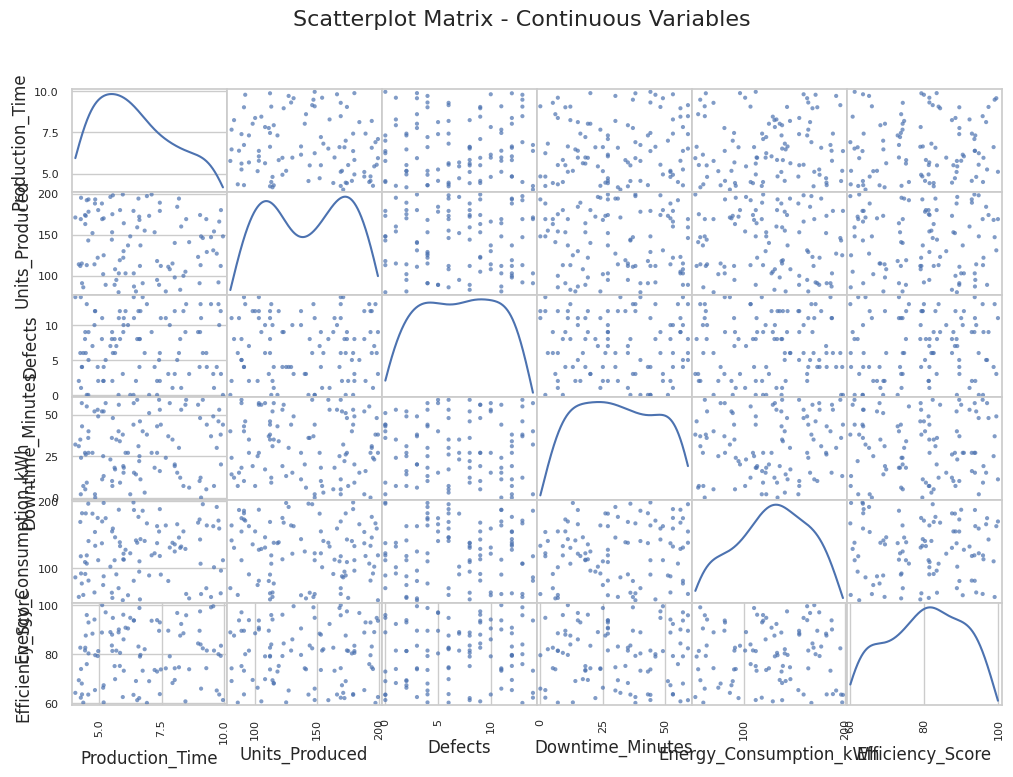

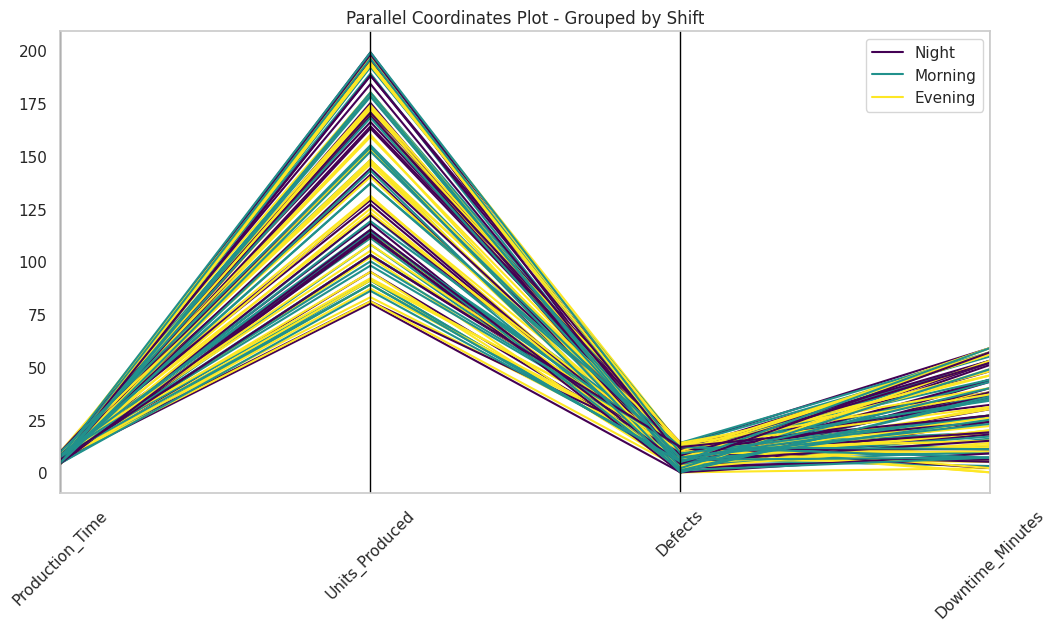

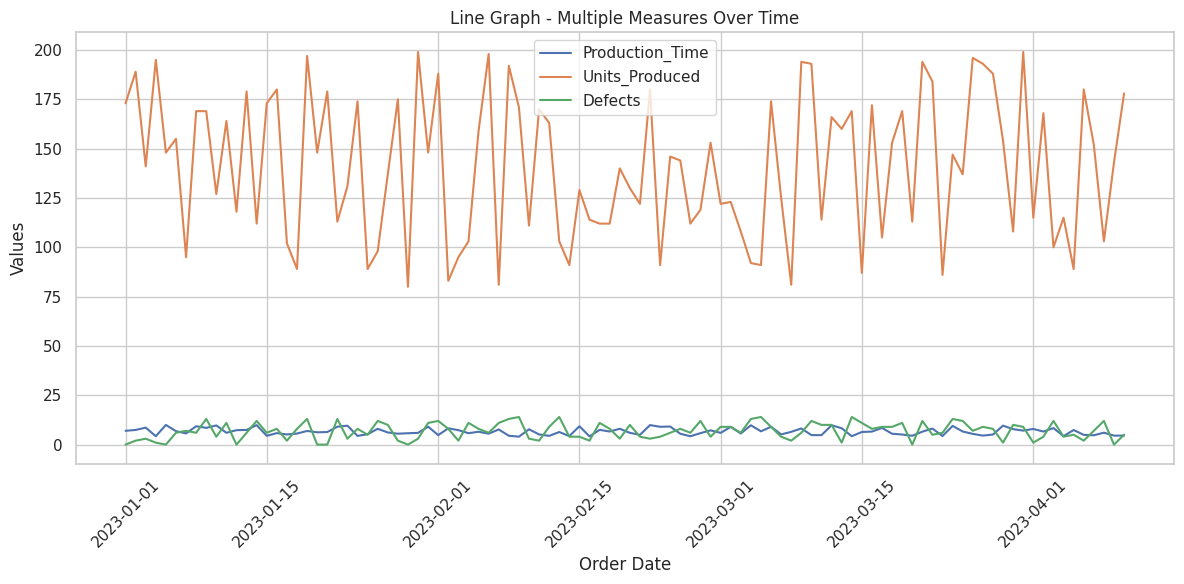

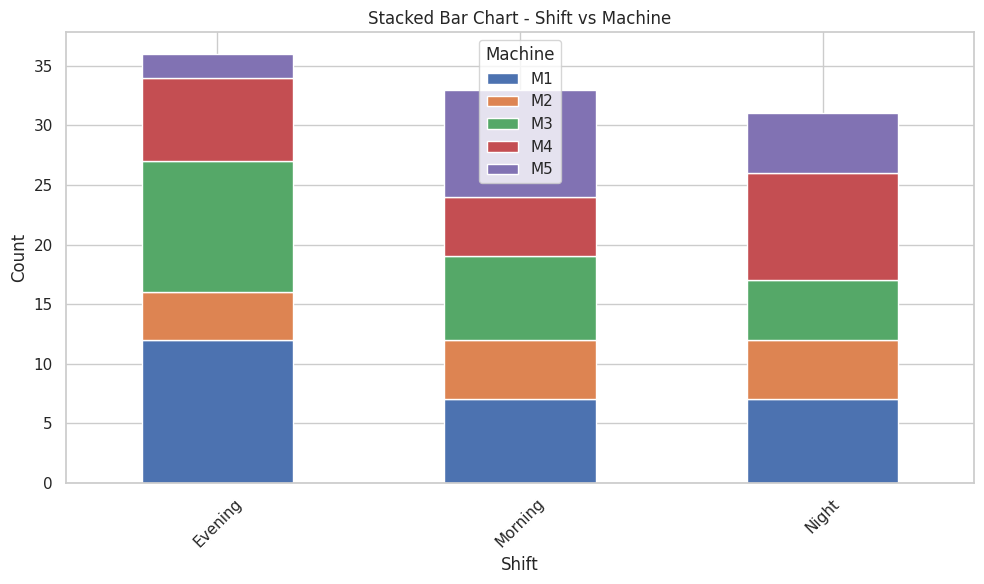

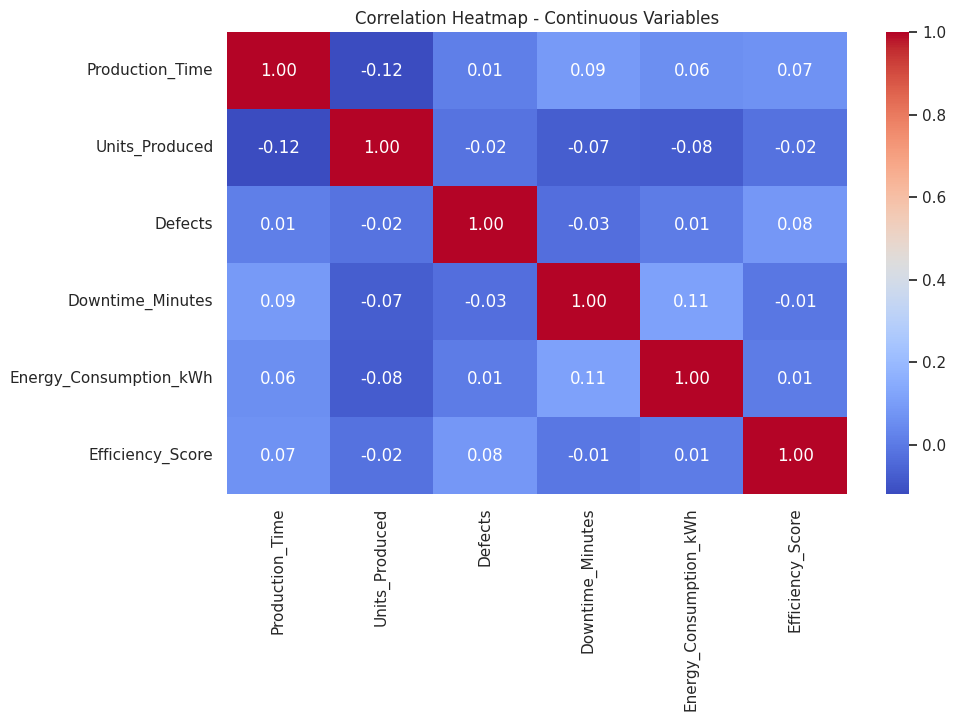

In [ ]:
# ---------------------------------------------
# Step 1: Import required libraries
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from pandas.plotting import scatter_matrix, parallel_coordinates

sns.set(style="whitegrid")

# ---------------------------------------------
# Step 2: Upload CSV File from Your System
# ---------------------------------------------
print("Please upload manufacturing_production_efficiency.csv file")
uploaded = files.upload()

# ---------------------------------------------
# Step 3: Read CSV File into DataFrame
# ---------------------------------------------
filename = list(uploaded.keys())[0]
df = pd.read_csv("/content/manufacturing_production_efficiency.csv")

# ---------------------------------------------
# Step 4: Display Initial Data
# ---------------------------------------------
print("First 5 rows of the dataset:")
print(df.head())

# ---------------------------------------------
# Step 5: Optional date parsing
# ---------------------------------------------
for date_col in ['Order Date', 'Ship Date']:
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# ---------------------------------------------
# Step 6: Identify Categorical & Continuous Columns
# ---------------------------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

# =============================================
# MULTIVARIATE ANALYSIS - TASK 4
# =============================================

# 1️⃣ Scatterplot Matrix
if len(continuous_cols) >= 3:
    plt.figure(figsize=(12, 8))
    scatter_matrix(df[continuous_cols], alpha=0.7, figsize=(12, 8), diagonal='kde')
    plt.suptitle("Scatterplot Matrix - Continuous Variables", fontsize=16)
    plt.show()
else:
    print("\nSkipping Scatterplot Matrix — need at least 3 continuous variables.")

# 2️⃣ Parallel Coordinates
if len(categorical_cols) > 0 and len(continuous_cols) >= 3:
    class_col = categorical_cols[0]
    plt.figure(figsize=(12, 6))
    parallel_coordinates(df[[class_col] + continuous_cols[:4]], class_column=class_col, colormap='viridis')
    plt.title(f"Parallel Coordinates Plot - Grouped by {class_col}")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nSkipping Parallel Coordinates — need at least 1 categorical and 3 continuous variables.")

# 3️⃣ Line Graph (Multiple Measures Over Time)
if 'Order Date' in df.columns and len(continuous_cols) >= 2:
    df_sorted = df.sort_values('Order Date')
    plt.figure(figsize=(12, 6))
    for col in continuous_cols[:3]:
        plt.plot(df_sorted['Order Date'], df_sorted[col], label=col)
    plt.title("Line Graph - Multiple Measures Over Time")
    plt.xlabel("Order Date")
    plt.ylabel("Values")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Line Graph — need 'Order Date' column and at least 2 continuous variables.")

# 4️⃣ Stacked Bar Chart
if len(categorical_cols) >= 2:
    cat1, cat2 = categorical_cols[:2]
    crosstab = pd.crosstab(df[cat1], df[cat2])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f"Stacked Bar Chart - {cat1} vs {cat2}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Stacked Bar Chart — need at least 2 categorical variables.")

# 5️⃣ Correlation Heatmap (Extra Insight)
if len(continuous_cols) >= 2:
    plt.figure(figsize=(10, 6))
    corr_matrix = df[continuous_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap - Continuous Variables")
    plt.show()
else:
    print("\nSkipping Correlation Heatmap — need at least 2 continuous variables.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')